__Need for Data Preparation__

Problems exist with data and so we need to identify the issues with Data and take appropriate steps.
1) Insufficient Data
2) Too much Data
3) Non-representative Data
4) Missing Data
5) Duplicate Data
6) Outliers


1) Insufficient Data
 - <font color=red>Issues</font>
   - Can lead to overfitting as the model tries hard from too little data
   - Can lead to underfitting by constructing overly simplistic model
 - <font color='blue'>Solutions</font>
   - Model Complexity: Simpler models work better with less data so don't build complex model
        Ex, Naive Bayes classifier, Logistic Regression or Ensemble (multiple learners)

   - Transfer Learning: Try to transfer the knowledge gained from prebuilt model (Deep Learning, Neural Networks does that)
   - Data Augmentation: From existing data, apply transformations so that newly formed data can aid in building model (Technique used with image data)
   - Synthetic Data: Use statistical techniques to build artificial data
 
2) Too much Data
 - <font color=red>Issues</font>
   - Curse of dimensionality
   - Outdated historical irrelevant data
 - <font color='blue'>Solutions</font> 
   - Apply Feature Selection: Statistically deciding which features are relevant
   - Apply Feature Engineering: Aggregating very low level data into useful features
   - Apply Dimensionality Reduction: Reduce complexity wihtout losing information (re-orient data into new axis to capture maximum variance in data)

3) Non-representative Data
 - <font color=red>Issues</font>
    
 - <font color='blue'>Solutions</font>


4) Missing Data
 - <font color=red>Issues</font>
 - <font color='blue'>Solutions</font>
   - Delete duplicate data
   - Impute data from inferred data

5) Duplicate Data
 - <font color=red>Issues</font>
 - <font color='blue'>Solutions</font>


6) Outliers
 - <font color=red>Issues</font>
 - <font color='blue'>Solutions</font>
   - Identify outliers
     - Distance from mean
     - Distance from fitted line
   - Cope with outliers
     - Drop
       - drop, if all attributes of this outlier are erroneous
       - set to mean, if only one attribute is erroneous
     - Cap/Floor
       - if genuine outlier, leave it as is, if model is not distorted
       - if genuine outlier, cap/floor, if model is distorted:
         - standardize data first, cap postive outliers to +3, floor negative outliers to -3
     - Set to mean

In [1]:
import numpy as np
import pandas as pd
import sklearn
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
auto_data = pd.read_csv('Data/cars.csv')
auto_data.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Bore,Stroke,Compression-ratio
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,1970,1,3.47,2.68,9
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,1970,1,3.47,2.68,?
2,plymouth satellite,18.0,?,318.0,150,3436,11.0,1970,1,2.68,3.47,9
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,1970,1,3.19,3.40,10
4,ford torino,17.0,8,302.0,140,3449,10.5,1970,1,3.19,3.40,8


In [3]:
auto_data.shape

(398, 12)

<font color=red>__Clean Data__</font>

In [4]:
# Replace '?' with NANs
auto_data.replace('?', np.nan, inplace=True)
auto_data.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Bore,Stroke,Compression-ratio
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,1970,1,3.47,2.68,9
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,1970,1,3.47,2.68,NaN
2,plymouth satellite,18.0,NaN,318.0,150,3436,11.0,1970,1,2.68,3.47,9
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,1970,1,3.19,3.40,10
4,ford torino,17.0,8,302.0,140,3449,10.5,1970,1,3.19,3.40,8


In [5]:
# Check for Null values
# MPG - 9, Cylinders - 2, Displacement - 1, Weight - 1, Acceleration - 1, comp ratio 2
auto_data.isna().sum()

Model                  0
MPG                    0
Cylinders              1
Displacement           0
Horsepower             6
Weight                 0
Acceleration           0
Year                   0
Origin                 0
Bore                 197
Stroke               197
Compression-ratio    198
dtype: int64

In [6]:
# Let us impute missing values of MPG with 'mean' MPG

auto_data.MPG.fillna(auto_data.MPG.mean(), inplace=True)

In [7]:
# Let us remove the 'Model' as it is not significant

auto_data.drop('Model', axis=1, inplace=True)

In [8]:
# Let us also drop the 'Bore, Stroke, Compression-ratio' as even they are not significant

auto_data.drop(['Bore', 'Stroke', 'Compression-ratio'], axis=1, inplace=True)

In [9]:
# Let us drop other missing values as we've suffient records and losing very less samples

auto_data.dropna(inplace=True)

In [10]:
# Let us take a look at the dataset

auto_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.0,8,307.0,130,3504,12.0,1970,1
1,15.0,8,350.0,165,3693,11.5,1970,1
3,16.0,8,304.0,150,3433,12.0,1970,1
4,17.0,8,302.0,140,3449,10.5,1970,1
5,15.0,8,429.0,198,4341,10.0,1970,1


In [11]:
# Let us calculate 'age' of the automobile and drop 'Year'

auto_data['Age'] = datetime.datetime.now().year - auto_data.Year
auto_data.drop('Year', axis=1, inplace=True)
auto_data.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
225,17.5,6,250.0,110,3520,16.4,1,43
0,18.0,8,307.0,130,3504,12.0,1,50
10,15.0,8,383.0,170,3563,10.0,1,50
305,28.4,4,151.0,90,2670,16.0,1,41
29,27.0,4,97.0,88,2130,14.5,3,49


In [12]:
# Let us take a glance over datatypes

auto_data.dtypes

MPG             float64
Cylinders        object
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Origin            int64
Age               int64
dtype: object

In [13]:
auto_data.Cylinders = auto_data.Cylinders.astype(int)

In [14]:
auto_data.Horsepower = auto_data.Horsepower.astype(int)

In [15]:
auto_data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,23.459847,5.465473,194.095908,104.352941,2976.411765,15.552941,1.578005,44.005115
std,7.810128,1.703152,104.590541,38.471278,850.173193,2.752786,0.806020,3.675975
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1.000000,38.000000
25%,17.000000,4.000000,105.000000,75.000000,2224.500000,13.800000,1.000000,41.000000
50%,23.000000,4.000000,151.000000,93.000000,2800.000000,15.500000,1.000000,44.000000
75%,29.000000,8.000000,264.500000,125.000000,3616.500000,17.050000,2.000000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,3.000000,50.000000


In [16]:
auto_data.to_csv('Data/cars_processed.csv', index=False)

In [17]:
!dir Data

 Volume in drive C is OS
 Volume Serial Number is D890-7037

 Directory of C:\Users\anand\Exercises\Ex_MachineLearning\Pluralsight\Preparing Data for Machine Learning\Data

13-Apr-20  10:19 AM    <DIR>          .
13-Apr-20  10:19 AM    <DIR>          ..
11-Apr-20  06:37 PM    <DIR>          .ipynb_checkpoints
11-Apr-20  06:28 PM            18,131 auto-mpg (orignal from kaggle).csv
11-Apr-20  07:07 PM            22,244 cars.csv
13-Apr-20  10:30 AM            12,646 cars_processed.csv
12-Apr-20  06:01 PM            23,873 diabetes.csv
13-Apr-20  10:29 AM            48,155 diabetes_processed.csv
13-Apr-20  10:10 AM           156,246 TypesOfData.png
               6 File(s)        281,295 bytes
               3 Dir(s)  408,126,435,328 bytes free


<font color=red>__Visualizing Relationships__</font>

In [18]:
auto_data.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int32
Weight            int64
Acceleration    float64
Origin            int64
Age               int64
dtype: object

Text(0, 0.5, 'Miles per gallon')

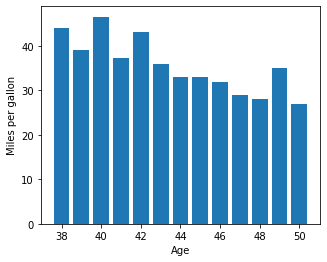

In [19]:
# Let us see the relationship between 'Age' and 'Mileage'

plt.figure(figsize=(5, 4))

plt.bar(auto_data.Age, auto_data.MPG)

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

Observations:
- __Older cars__ have __low mileage__ and __newer cars__ will have __more mileage__.

Text(0, 0.5, 'Miles per gallon')

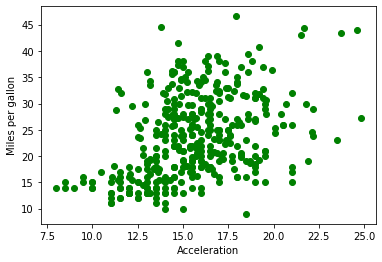

In [20]:
# Let us examine the relationship between 'Acceleration' and 'Mileage'

plt.scatter(auto_data.Acceleration, auto_data.MPG, color='g')

plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

Obserbations:
- Cars with __higher acceleration__ seems to have __better mileage__

Text(0, 0.5, 'Miles per gallon')

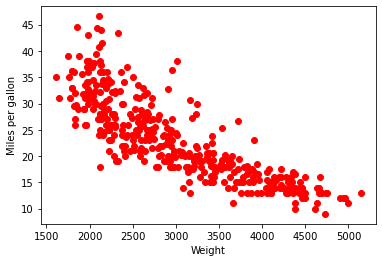

In [21]:
# Let us examine the relationship between 'Weight' and 'Mileage'

plt.scatter(auto_data.Weight, auto_data.MPG, color='r')

plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

Observations:
- As the __weight__ of car __increases__ the __mileage comes down__

Text(0, 0.5, 'Miles per gallon')

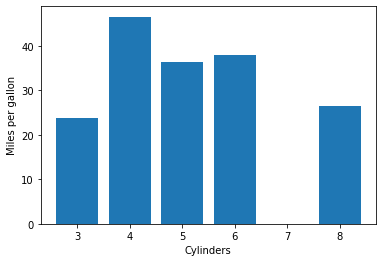

In [22]:
# Let us examine the relationship between 'Cylinders' and 'Mileage'

plt.bar(auto_data.Cylinders, auto_data.MPG)

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon')

Observations:
- From the graph we could __not draw any inferences__

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\anand

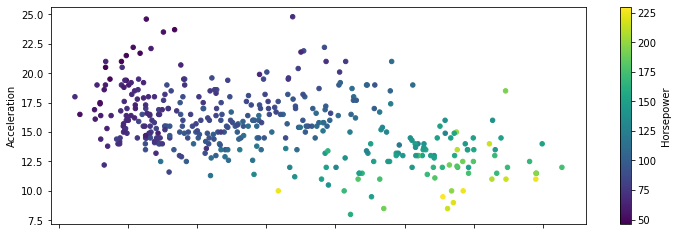

In [23]:
# Let us examine the relationship between 'Acceleration', 'Weight' and 'Horsepower'

auto_data.plot.scatter(x='Weight', y='Acceleration', c='Horsepower', colormap='viridis', figsize=(12, 4))

Observations:
- As the weight of the car increases, the Acceleration goes down
- Cars with __higher Acceleration__ and __lower Weight__ tend to have __higher Horsepower__

In [24]:
auto_data.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
312,37.2,4,86.0,65,2019,16.4,3,40
372,27.0,4,151.0,90,2735,18.0,1,38
382,34.0,4,108.0,70,2245,16.9,3,38
311,32.1,4,98.0,70,2120,15.5,1,40
39,14.0,8,400.0,175,4464,11.5,1,49
226,20.5,6,231.0,105,3425,16.9,1,43
287,16.5,8,351.0,138,3955,13.2,1,41
145,32.0,4,83.0,61,2003,19.0,3,46
95,12.0,8,455.0,225,4951,11.0,1,47
125,20.0,6,198.0,95,3102,16.5,1,46


In [25]:
# Let us view the pair-wise correlations 

auto_corr = auto_data.corr()
auto_corr

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
MPG,1.000000,-0.777643,-0.804956,-0.778193,-0.832109,0.422115,0.564652,-0.579960
Cylinders,-0.777643,1.000000,0.950713,0.842372,0.898344,-0.501583,-0.568186,0.341595
Displacement,-0.804956,0.950713,1.000000,0.896888,0.933379,-0.541667,-0.613869,0.366835
Horsepower,-0.778193,0.842372,0.896888,1.000000,0.864776,-0.687827,-0.454114,0.413578
Weight,-0.832109,0.898344,0.933379,0.864776,1.000000,-0.416164,-0.584617,0.308031
Acceleration,0.422115,-0.501583,-0.541667,-0.687827,-0.416164,1.000000,0.210596,-0.285421
Origin,0.564652,-0.568186,-0.613869,-0.454114,-0.584617,0.210596,1.000000,-0.179273
Age,-0.579960,0.341595,0.366835,0.413578,0.308031,-0.285421,-0.179273,1.000000


Observations:
- Acceleration and MPG are +vely correlated
- Weight and MPG are -vely correlated

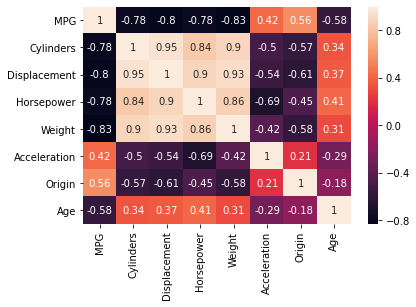

In [26]:
# Let us view the correlations pictorially

sns.heatmap(auto_corr, annot=True)

In [27]:
feat_corr = auto_data.corr()['MPG']
feat_corr

MPG             1.000000
Cylinders      -0.777643
Displacement   -0.804956
Horsepower     -0.778193
Weight         -0.832109
Acceleration    0.422115
Origin          0.564652
Age            -0.579960
Name: MPG, dtype: float64

In [28]:
# Get absolute values of correlation

feat_corr = feat_corr.to_frame().abs()

In [29]:
# Sort the correlation values in ascending order

feat_corr.sort_values(by='MPG', ascending=True)

,MPG
Acceleration,0.422115
Origin,0.564652
Age,0.579960
Cylinders,0.777643
Horsepower,0.778193
Displacement,0.804956
Weight,0.832109
MPG,1.000000


Let us build linear regression with each of the features with 'MPG' and study how well they fit. The <font color=red>$r^2$ score</font> (computed on training or testing data) gives us __how much of the variance is captured by the regression model__.

<font color=red>__Building Regression Model__</font>

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [31]:
auto_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.0,8,307.0,130,3504,12.0,1,50
1,15.0,8,350.0,165,3693,11.5,1,50
3,16.0,8,304.0,150,3433,12.0,1,50
4,17.0,8,302.0,140,3449,10.5,1,50
5,15.0,8,429.0,198,4341,10.0,1,50


Training score =  0.16864357315609424
Testing score =  0.21963813540098653


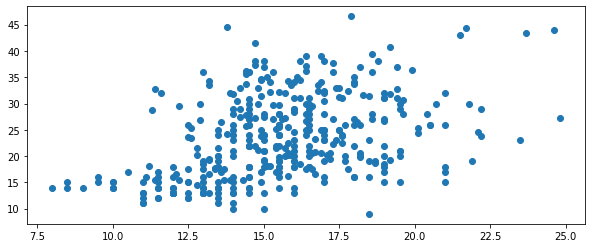

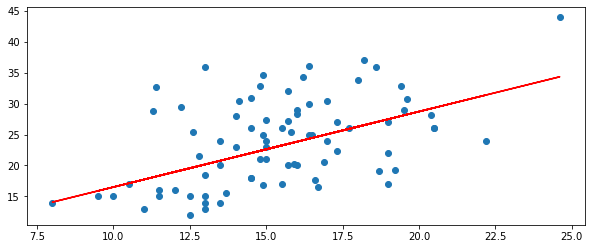

In [32]:
# Let us do a simple regression using one feature 'Age'
X = auto_data[['Acceleration']]
y = auto_data['MPG']

plt.figure(figsize=(10, 4))
plt.scatter(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression(normalize=True).fit(X_train, y_train)
print('Training score = ', lr.score(X_train, y_train))

y_pred = lr.predict(X_test)
print('Testing score = ', r2_score(y_test, y_pred))

plt.figure(figsize=(10, 4))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='r')

Training score =  0.3339204841435217
Testing score =  0.22949445395529722


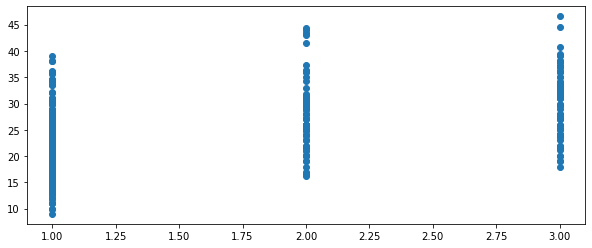

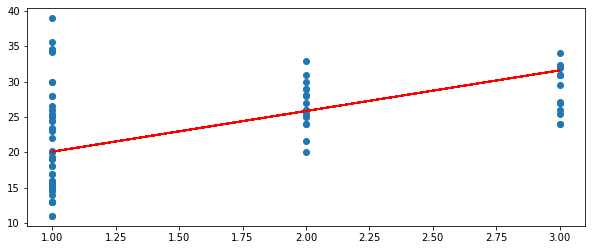

In [33]:
# Let us do a simple regression using one feature 'Age'
X = auto_data[['Origin']]
y = auto_data['MPG']

plt.figure(figsize=(10, 4))
plt.scatter(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression(normalize=True).fit(X_train, y_train)
print('Training score = ', lr.score(X_train, y_train))

y_pred = lr.predict(X_test)
print('Testing score = ', r2_score(y_test, y_pred))

plt.figure(figsize=(10, 4))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='r')

Training score =  0.3055865153308732
Testing score =  0.4231043790043839


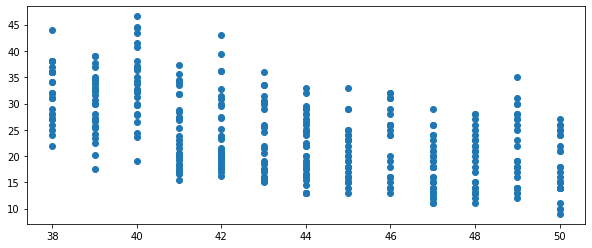

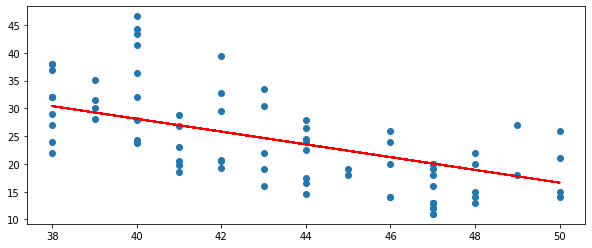

In [34]:
# Let us do a simple regression using one feature 'Age'
X = auto_data[['Age']]
y = auto_data['MPG']

plt.figure(figsize=(10, 4))
plt.scatter(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression(normalize=True).fit(X_train, y_train)
print('Training score = ', lr.score(X_train, y_train))

y_pred = lr.predict(X_test)
print('Testing score = ', r2_score(y_test, y_pred))

plt.figure(figsize=(10, 4))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='r')

We can notice __low__ <font color=red> $ r^2 scores $ </font> on training and testing data indicating that __feature data__ is spread __widely__.

Training score =  0.6281983170182919
Testing score =  0.499536074073765


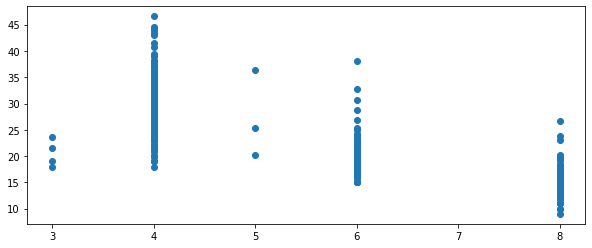

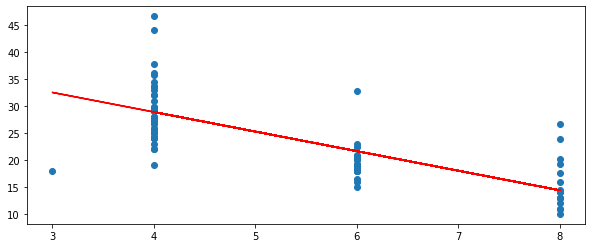

In [35]:
# Let us do a simple regression using one feature 'Age'
X = auto_data[['Cylinders']]
y = auto_data['MPG']

plt.figure(figsize=(10, 4))
plt.scatter(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression(normalize=True).fit(X_train, y_train)
print('Training score = ', lr.score(X_train, y_train))

y_pred = lr.predict(X_test)
print('Testing score = ', r2_score(y_test, y_pred))

plt.figure(figsize=(10, 4))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='r')

We can notice improved <font color=red> $ r^2 scores $ </font> on training and testing data indicating that __feature data__ is spread __widely__.

Training score =  0.5958265803992215
Testing score =  0.6385045037044641


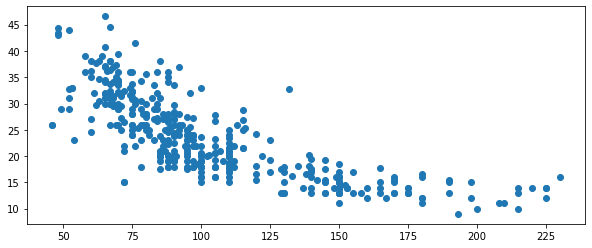

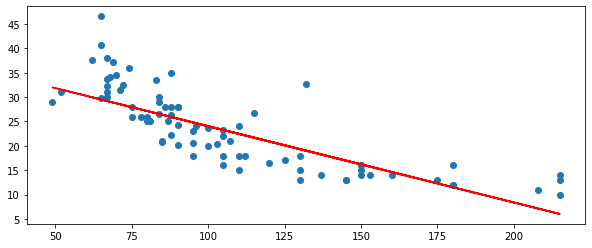

In [36]:
# Let us do a simple regression using one feature 'Age'
X = auto_data[['Horsepower']]
y = auto_data['MPG']

plt.figure(figsize=(10, 4))
plt.scatter(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression(normalize=True).fit(X_train, y_train)
print('Training score = ', lr.score(X_train, y_train))

y_pred = lr.predict(X_test)
print('Testing score = ', r2_score(y_test, y_pred))

plt.figure(figsize=(10, 4))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='r')

We can notice some more improved <font color=red> $ r^2 scores $ </font> on training and testing data indicating that __feature data__ is spread __widely__.

Training score =  0.6412895692807552
Testing score =  0.6786118156680736


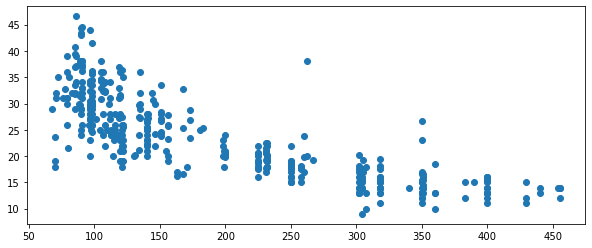

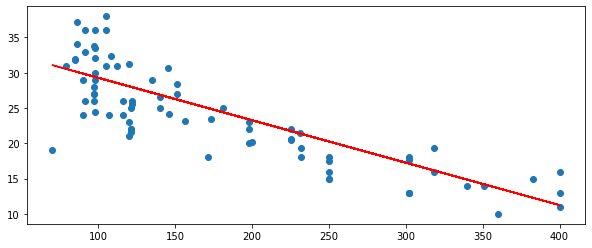

In [37]:
# Let us do a simple regression using one feature 'Age'
X = auto_data[['Displacement']]
y = auto_data['MPG']

plt.figure(figsize=(10, 4))
plt.scatter(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression(normalize=True).fit(X_train, y_train)
print('Training score = ', lr.score(X_train, y_train))

y_pred = lr.predict(X_test)
print('Testing score = ', r2_score(y_test, y_pred))

plt.figure(figsize=(10, 4))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='r')

We can notice some more improved <font color=red> $ r^2 scores $ </font> on training and testing data indicating that __feature data__ is spread __widely__.

Training score =  0.7168635568743572
Testing score =  0.5990687596950417


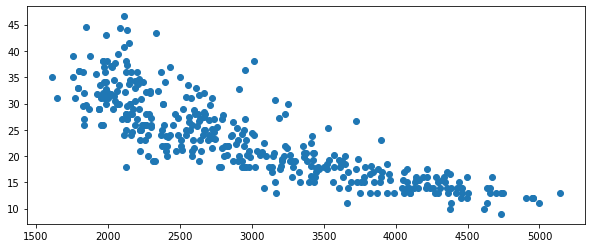

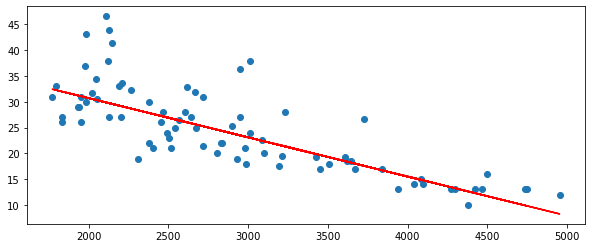

In [38]:
# Let us do a simple regression using one feature 'Age'
X = auto_data[['Weight']]
y = auto_data['MPG']

plt.figure(figsize=(10, 4))
plt.scatter(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression(normalize=True).fit(X_train, y_train)
print('Training score = ', lr.score(X_train, y_train))

y_pred = lr.predict(X_test)
print('Testing score = ', r2_score(y_test, y_pred))

plt.figure(figsize=(10, 4))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='r')

We can notice __best__ <font color=red> $ r^2 scores $ </font> on training and testing data indicating that __feature data__ is spread __widely__.
__This was the best score considering one feature at a time.__

Let us take all the features at a time and check for betterment:

In [39]:
# Let us do a simple regression using one feature 'Age'
X = auto_data.drop('MPG', axis=1)
y = auto_data['MPG']

#plt.figure(figsize=(10, 4))
#plt.scatter(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression(normalize=True).fit(X_train, y_train)
print('Training score = ', lr.score(X_train, y_train))

y_pred = lr.predict(X_test)
print('Testing score = ', r2_score(y_test, y_pred))

#plt.figure(figsize=(10, 4))
#plt.scatter(X_test, y_test)
#plt.plot(X_test, y_pred, color='r')

Training score =  0.8230365643448643
Testing score =  0.8101613231094988


Observations:

__We've achieved the best score when compared to considering one feature at a time.__

__<font color=red>Univariate</font> feature Imputation using <font color=red>SimpleImputer</font> in scikit Learn__

In [40]:
diabetes = pd.read_csv('Data/diabetes.csv')
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [41]:
diabetes.shape

(768, 9)

In [42]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Observations:
- __Zeros__ in Pregnancies __makes sense__.
- __Zeros__ in Glucose, BloodPressure, SkinThickness, Insulin, BMI __doesn't make sense__.

In [44]:
print('Mean = ', diabetes.SkinThickness.mean(), 'Median = ', diabetes.SkinThickness.median())
print('Mean = ', diabetes.Glucose.mean(), 'Median = ', diabetes.Glucose.median())
print('Mean = ', diabetes.BloodPressure.mean(), 'Median = ', diabetes.BloodPressure.median())
print('Mean = ', diabetes.BMI.mean(), 'Median = ', diabetes.BMI.median())

Mean =  20.536458333333332 Median =  23.0
Mean =  120.89453125 Median =  117.0
Mean =  69.10546875 Median =  72.0
Mean =  31.992578124999998 Median =  32.0


In [45]:
from sklearn.impute import SimpleImputer

In [46]:
# Let us replace 0s with Nans
diabetes.Glucose.replace(0, np.NaN, inplace=True)
diabetes.BloodPressure.replace(0, np.NaN, inplace=True)
diabetes.SkinThickness.replace(0, np.NaN, inplace=True)
diabetes.Insulin.replace(0, np.NaN, inplace=True)
diabetes.BMI.replace(0, np.NaN, inplace=True)

In [47]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [48]:
# Impute SkinThickness
# SimpleImputer requires 2d array as input, so we'll reshape

si = SimpleImputer(missing_values=np.nan, strategy='mean')
diabetes.SkinThickness = si.fit_transform(diabetes.SkinThickness.values.reshape(-1, 1))
diabetes.SkinThickness.describe()

count    768.000000
mean      29.153420
std        8.790942
min        7.000000
25%       25.000000
50%       29.153420
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [49]:
# Impute Glucose
# SimpleImputer requires 2d array as input, so we'll reshape

si = SimpleImputer(missing_values=np.nan, strategy='median')
diabetes.Glucose = si.fit_transform(diabetes.Glucose.values.reshape(-1, 1))
diabetes.Glucose.describe()

count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [50]:
# Impute BloodPressure
# SimpleImputer requires 2d array as input, so we'll reshape

si = SimpleImputer(missing_values=np.nan, strategy='mean')
diabetes.BloodPressure = si.fit_transform(diabetes.BloodPressure.values.reshape(-1, 1))
diabetes.BloodPressure.describe()

count    768.000000
mean      72.405184
std       12.096346
min       24.000000
25%       64.000000
50%       72.202592
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [51]:
# Impute BMI
# SimpleImputer requires 2d array as input, so we'll reshape

si = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=32)
diabetes.BMI = si.fit_transform(diabetes.BMI.values.reshape(-1, 1))
diabetes.BMI.describe()

count    768.000000
mean      32.450911
std        6.875366
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [52]:
# I want to verify the selection of mean or median as per Skew
diabetes.skew().sort_values()

BloodPressure               0.137305
Glucose                     0.535587
BMI                         0.601059
Outcome                     0.635017
SkinThickness               0.822173
Pregnancies                 0.901674
Age                         1.129597
DiabetesPedigreeFunction    1.919911
Insulin                     2.166464
dtype: float64

__<font color=red>Mutlivariate</font> feature Imputation using <font color=red>IterativeImputer</font> in Scikit__

In [53]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [54]:
diabetes_features = diabetes.drop('Outcome', axis=1)
diabetes_label = diabetes['Outcome']

In [55]:
# Instantiate IterativeImputer

itrimp = IterativeImputer(max_iter=10000, random_state=0)

In [56]:
# Train using features

itrimp.fit(diabetes_features)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10000, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, tol=0.001, verbose=0)

In [57]:
# Fit to impute BMI and transform into Dataframe

diabetes_features = pd.DataFrame(itrimp.transform(diabetes_features), columns=diabetes_features.columns)
diabetes_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.00000,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.00000,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,29.15342,269.881846,23.3,0.672,32.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0


In [58]:
df1 = diabetes_features
df2 = pd.DataFrame(diabetes_label, columns=['Outcome'])
df = pd.concat([df1, df2], axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.00000,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.15342,269.881846,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.00000,158.510349,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0
766,1.0,126.0,60.0,29.15342,173.942803,30.1,0.349,47.0,1


In [60]:
df.to_csv('Data/diabetes_processed.csv', index=False)